# FitNotes Test
## Marshall Ferguson - 12/2021

The goal of this notebook is to successfully implement a ML model that can predict how much weight I will be able to lift for a given exercise on a given date.

For example: Based on the data, how much will I be able to bench press for 10 reps on 10/5/2022

In [24]:
# Imports

import datetime
import pandas as pd

In [3]:
# Import data

df = pd.read_csv(r'..\test_data\FitNotes_Test_Data.csv')

df.head()

,Date,Exercise,Category,Weight (lbs),Reps,Distance,Distance Unit,Time
0,2020-07-11,Flat Barbell Bench Press,Chest,45.0,12.0,NaN,NaN,NaN
1,2020-07-11,Flat Barbell Bench Press,Chest,65.0,8.0,NaN,NaN,NaN
2,2020-07-11,Flat Barbell Bench Press,Chest,95.0,6.0,NaN,NaN,NaN
3,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN
4,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN


Looking at the data a little more closely, it looks like it will be easier to predict the volume lifted on a given day rather than predicting the weight for a given number of reps. Let's focus on predicting volume for now, and see where that leads us.

In [4]:
df['Volume (lbs)'] = df['Weight (lbs)'] * df['Reps']

df.head()

,Date,Exercise,Category,Weight (lbs),Reps,Distance,Distance Unit,Time,Volume (lbs)
0,2020-07-11,Flat Barbell Bench Press,Chest,45.0,12.0,NaN,NaN,NaN,540.0
1,2020-07-11,Flat Barbell Bench Press,Chest,65.0,8.0,NaN,NaN,NaN,520.0
2,2020-07-11,Flat Barbell Bench Press,Chest,95.0,6.0,NaN,NaN,NaN,570.0
3,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN,630.0
4,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN,630.0


In [5]:
df_group_date = df.groupby(['Date', 'Exercise']).sum()

df_group_date

Weight (lbs)  Reps  Distance  \
Date       Exercise                                                     
2020-07-11 Arnold Dumbbell Press                 85.0  57.0       0.0   
           Flat Barbell Bench Press             730.0  60.0       0.0   
           Incline Dumbbell Bench Press          60.0  34.0       0.0   
           Lateral Dumbbell Raise                24.0  36.0       0.0   
2020-07-12 Barbell Front Squat                  135.0  30.0       0.0   
...                                               ...   ...       ...   
2021-11-30 Flat Barbell Bench Press             480.0  69.0       0.0   
           Incline Dumbbell Bench Press          75.0  30.0       0.0   
           Lateral Dumbbell Raise                48.0  78.0       0.0   
           Overhead Press                       605.0  49.0       0.0   
           Rope Push Down                       195.0  34.0       0.0   

                                         Volume (lbs)  
Date       Exercise                                    
2020-07-11 Arnold Dumbbell Press                930.0  
           Flat Barbell Bench Press            5200.0  
           Incline Dumbbell Bench Press         680.0  
           Lateral Dumbbell Raise               288.0  
2020-07-12 Barbell Front Squat                 1350.0  
...                                               ...  
2021-11-30 Flat Barbell Bench Press            5475.0  
           Incline Dumbbell Bench Press         750.0  
           Lateral Dumbbell Raise               624.0  
           Overhead Press                      3505.0  
           Rope Push Down                      2210.0  

[431 rows x 4 columns]

In [6]:
df_group_exercise = df.groupby(['Exercise', 'Date']).sum()

df_group_exercise

Weight (lbs)   Reps  Distance  \
Exercise                         Date                                        
Ab Lounge                        2020-07-30           0.0  100.0       0.0   
                                 2020-08-03           0.0  100.0       0.0   
                                 2020-08-07           0.0  100.0       0.0   
                                 2020-11-24           0.0   60.0       0.0   
                                 2021-01-29           0.0   60.0       0.0   
...                                                   ...    ...       ...   
V-Grip Seated Cable Row (Pulley) 2021-09-28         470.0   51.0       0.0   
                                 2021-10-06         380.0   36.0       0.0   
                                 2021-11-22         530.0   48.0       0.0   
                                 2021-11-25         450.0   34.0       0.0   
                                 2021-11-29         450.0   36.0       0.0   

                                             Volume (lbs)  
Exercise                         Date                      
Ab Lounge                        2020-07-30           0.0  
                                 2020-08-03           0.0  
                                 2020-08-07           0.0  
                                 2020-11-24           0.0  
                                 2021-01-29           0.0  
...                                                   ...  
V-Grip Seated Cable Row (Pulley) 2021-09-28        5910.0  
                                 2021-10-06        4560.0  
                                 2021-11-22        6360.0  
                                 2021-11-25        5100.0  
                                 2021-11-29        5400.0  

[431 rows x 4 columns]

In [7]:
df_group_exercise['Volume (lbs)']

Exercise                          Date      
Ab Lounge                         2020-07-30       0.0
                                  2020-08-03       0.0
                                  2020-08-07       0.0
                                  2020-11-24       0.0
                                  2021-01-29       0.0
                                                 ...  
V-Grip Seated Cable Row (Pulley)  2021-09-28    5910.0
                                  2021-10-06    4560.0
                                  2021-11-22    6360.0
                                  2021-11-25    5100.0
                                  2021-11-29    5400.0
Name: Volume (lbs), Length: 431, dtype: float64

Since we are trying to predict Bench Press volume, let's pull out just the Bench Press data from the original DataFrame

In [8]:
df_bench_press = df.where(df['Exercise'] == 'Flat Barbell Bench Press')

df_bench_press.head()

,Date,Exercise,Category,Weight (lbs),Reps,Distance,Distance Unit,Time,Volume (lbs)
0,2020-07-11,Flat Barbell Bench Press,Chest,45.0,12.0,NaN,NaN,NaN,540.0
1,2020-07-11,Flat Barbell Bench Press,Chest,65.0,8.0,NaN,NaN,NaN,520.0
2,2020-07-11,Flat Barbell Bench Press,Chest,95.0,6.0,NaN,NaN,NaN,570.0
3,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN,630.0
4,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN,630.0


In [9]:
df_bench_press.tail()

,Date,Exercise,Category,Weight (lbs),Reps,Distance,Distance Unit,Time,Volume (lbs)
2061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's get rid of all the rows with NaN for a Date

In [10]:
df_bench_press = df_bench_press.dropna(how='all')

df_bench_press.tail()

,Date,Exercise,Category,Weight (lbs),Reps,Distance,Distance Unit,Time,Volume (lbs)
2046,2021-11-30,Flat Barbell Bench Press,Chest,65.0,12.0,NaN,NaN,NaN,780.0
2047,2021-11-30,Flat Barbell Bench Press,Chest,85.0,12.0,NaN,NaN,NaN,1020.0
2048,2021-11-30,Flat Barbell Bench Press,Chest,95.0,12.0,NaN,NaN,NaN,1140.0
2049,2021-11-30,Flat Barbell Bench Press,Chest,95.0,12.0,NaN,NaN,NaN,1140.0
2050,2021-11-30,Flat Barbell Bench Press,Chest,95.0,9.0,NaN,NaN,NaN,855.0


In [11]:
df_bench_press.shape

(308, 9)

At first it looked like there were still too many rows in df_bench_press, but looking at the shape confirms that we have gotten rid of all the empty rows

In [12]:
df_bench_group_date = df_bench_press.groupby('Date').sum()

df_bench_group_date

,Weight (lbs),Reps,Distance,Volume (lbs)
Date,,,,
2020-07-11,730.0,60.0,0.0,5200.0
2020-07-13,390.0,69.0,0.0,4365.0
2020-07-30,720.0,60.0,0.0,5020.0
2020-08-03,225.0,25.0,0.0,1125.0
2020-08-10,250.0,25.0,0.0,1250.0
2020-09-02,390.0,23.0,0.0,1905.0
2020-09-09,970.0,39.0,0.0,4005.0
2020-09-15,890.0,47.0,0.0,4725.0
2020-09-18,530.0,66.0,0.0,5590.0


<AxesSubplot:xlabel='Date'>

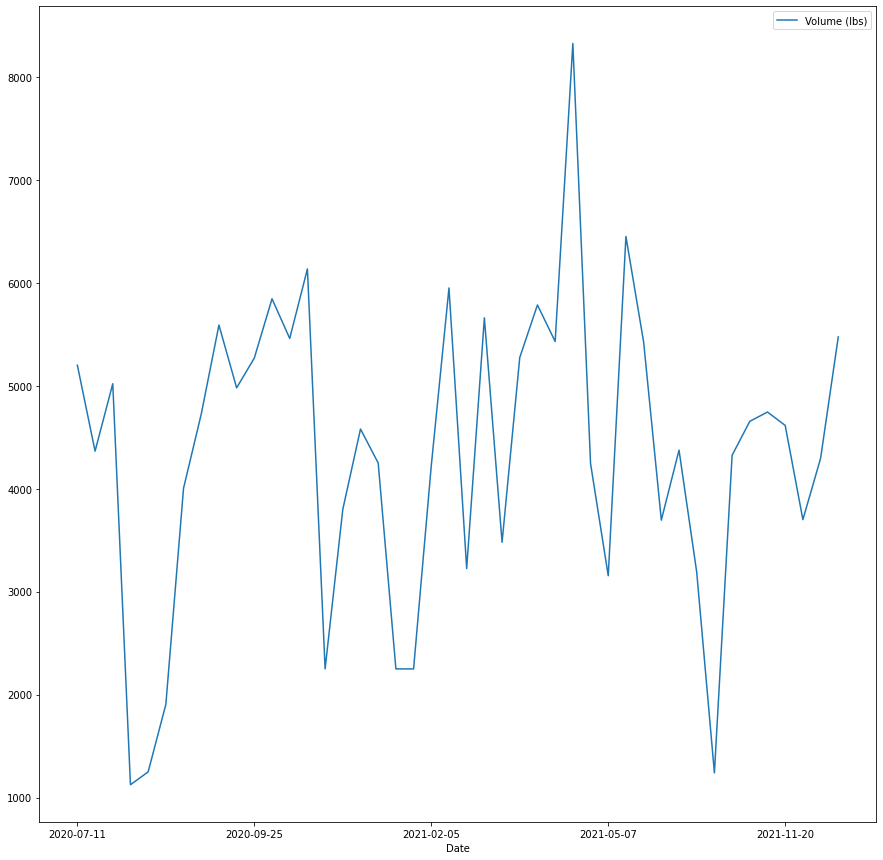

In [16]:
df_bench_group_date.plot(y = 'Volume (lbs)', figsize = [15, 15])

In [34]:
first_day = datetime.datetime.strptime(df['Date'][0], '%Y-%m-%d').date()

first_day

datetime.date(2020, 7, 11)

In [53]:
days_since_first_td = []
for date in df['Date']:
    days_since_first_td.append(datetime.datetime.strptime(date, '%Y-%m-%d').date() - first_day)

days_since_first_td

[datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(days=1),
 datetime.timedelta(da

In [54]:
days_since_first_int = []
for day in days_since_first_td:
    days_since_first_int.append(day.days)

days_since_first_int

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 53,
 53,
 53,
 53,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,

In [55]:
df['Days Since First Date'] = days_since_first_int

df.tail()

,Date,Exercise,Category,Weight (lbs),Reps,Distance,Distance Unit,Time,Volume (lbs),Days Since First Date
2061,2021-11-30,Lateral Dumbbell Raise,Shoulders,8.0,12.0,NaN,NaN,NaN,96.0,507
2062,2021-11-30,Cable Overhead Triceps Extension,Triceps,55.0,10.0,NaN,NaN,NaN,550.0,507
2063,2021-11-30,Lateral Dumbbell Raise,Shoulders,8.0,12.0,NaN,NaN,NaN,96.0,507
2064,2021-11-30,Cable Overhead Triceps Extension,Triceps,55.0,10.0,NaN,NaN,NaN,550.0,507
2065,2021-11-30,Lateral Dumbbell Raise,Shoulders,8.0,12.0,NaN,NaN,NaN,96.0,507


In [56]:
df.corr()

,Weight (lbs),Reps,Distance,Volume (lbs),Days Since First Date
Weight (lbs),1.000000,-0.542518,NaN,0.708115,-0.050337
Reps,-0.542518,1.000000,NaN,0.037821,-0.007007
Distance,NaN,NaN,1.000000,NaN,-0.102022
Volume (lbs),0.708115,0.037821,NaN,1.000000,-0.030915
Days Since First Date,-0.050337,-0.007007,-0.102022,-0.030915,1.000000
